### Initialization

In [1]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from fitlab.resman import RESMAN
from tools.tools import load_config

%matplotlib inline
rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica']})

In [2]:
conf = load_config('../fitlab/inputs/upol_compass.py')
conf['resman'] = RESMAN(conf)
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 5002

### Preparing Data

In [3]:
# Bins
xBin = [0.003, 0.008, 0.013, 0.02, 0.032, 0.055, 0.1, 0.21, 0.4]
Q2Bin = [1.0, 1.7, 3.0, 7.0, 16.0, 81.0]

x_labels = tuple(map(chr, range(97, 97 + len(xBin) - 1)))
q2_labels = tuple(map(chr, range(65, 65 + len(Q2Bin) - 1)))

groups = [(x_label, q2_label)
          for x_label in x_labels
          for q2_label in q2_labels]

# Plotting info
gridmap = [32, 24, 33, 25, 34, 26, 18, 35, 27, 19, 36, 28, 20, 12, 29, 21, 13, 22, 14, 6, 15, 7]
# gridmap -> map of ith subplots on 5x8 grid

shairYax = [6, 12, 18, 24, 32]  # Subplots with y-axes ticks

shairXax = [15, 22, 29, 32, 33, 34, 35, 36]  # Subplots with x-axes ticks

Zcolor = ["red", "green", "blue", "orange"]

Zmark = ["o", "o", "o", "o"]

Zline = [':', '-.', '--', '-']

In [4]:
# Reading and restructuring data
data = pd.read_excel('../database/sidis/expdata/5001.xlsx')

data["delta"] = np.sqrt(data["stat_u"] ** 2.0 + data["sys_u"] ** 2.0)
data["qT"] = data["pT"] / data["z"]

data['xClas'] = pd.cut(data['x'], xBin, labels=x_labels)
data['xBin'] = pd.cut(data['x'], xBin)

data['Q2Clas'] = pd.cut(data['Q2'], Q2Bin, labels=q2_labels)
data['Q2Bin'] = pd.cut(data['Q2'], Q2Bin)

z = data['z'].unique()  # groups of z

print(data.head())
print()
print("Columns:", ", ".join(data.columns))

   Ebeam      x    Q2      y    z        pT   pT2        obs   value  stat_u  \
0    160  0.157  20.0  0.439  0.2  0.300000  0.09  M_Compass  6.2719  0.3126   
1    160  0.157  20.0  0.439  0.2  0.331662  0.11  M_Compass  6.2175  0.3135   
2    160  0.157  20.0  0.439  0.2  0.360555  0.13  M_Compass  5.0537  0.2711   
3    160  0.157  20.0  0.439  0.2  0.400000  0.16  M_Compass  4.8854  0.2244   
4    160  0.157  20.0  0.439  0.2  0.424264  0.18  M_Compass  4.1757  0.2275   

       ...            F2        yp        yh          W2     delta        qT  \
0      ...       0.64392  3.414464 -0.998970  108.268379  0.329795  1.500000   
1      ...       0.64392  3.414464 -0.914156  108.268379  0.330521  1.658312   
2      ...       0.64392  3.414464 -0.841657  108.268379  0.291452  1.802776   
3      ...       0.64392  3.414464 -0.749458  108.268379  0.248476  2.000000   
4      ...       0.64392  3.414464 -0.696253  108.268379  0.252741  2.121320   

   xClas         xBin  Q2Clas         

In [5]:
# Reading and restructuring data for COMPASS
# Merging data
UPOL = pd.concat(pd.DataFrame(d)
                 for d in conf['resman'].sidisres.tabs.values())

data5001 = UPOL[UPOL['hadron'] == 'pi+']

# Calculate measurment error
data5001["delta"] = np.sqrt((data5001["stat_u"] ** 2.0 + data5001["sys_u"] ** 2.0))
data5001["qT"] = data5001["pT"] / data5001["z"]

data5001['xClas'] = pd.cut(data5001['x'], xBin, labels=x_labels)
data5001['xBin'] = pd.cut(data5001['x'], xBin)

data5001['Q2Clas'] = pd.cut(data5001['Q2'], Q2Bin, labels=q2_labels)
data5001['Q2Bin'] = pd.cut(data5001['Q2'], Q2Bin)

print(data5001.head())
print()
print('Columns:', ', '.join(data5001.columns))

#print()
#print("len(data5001['x']):", len(data5001['x']))
#print("len(data['x']):", len(data['x']))
#print()
#print("Columns in data5001 not in data:", ", ".join(set(data5001.columns) - set(data.columns)))
#print("Columns in data not in data5001:", ", ".join(set(data.columns) - set(data5001.columns)))
# data5001 has more columns but significantly fewer rows than data

   Ebeam       F2    N    Q2  Shift          W2     alpha      col hadron  \
0    160  0.64392  1.0  20.0    0.0  108.268379  0.329795  compass    pi+   
1    160  0.64392  1.0  20.0    0.0  108.268379  0.330521  compass    pi+   
2    160  0.64392  1.0  20.0    0.0  108.268379  0.291452  compass    pi+   
3    160  0.64392  1.0  20.0    0.0  108.268379  0.248476  compass    pi+   
4    160  0.64392  1.0  20.0    0.0  108.268379  0.252741  compass    pi+   

         obs      ...           y        yh        yp    z     delta  \
0  M_Compass      ...       0.439 -0.998970  3.414464  0.2  0.329795   
1  M_Compass      ...       0.439 -0.914156  3.414464  0.2  0.330521   
2  M_Compass      ...       0.439 -0.841657  3.414464  0.2  0.291452   
3  M_Compass      ...       0.439 -0.749458  3.414464  0.2  0.248476   
4  M_Compass      ...       0.439 -0.696253  3.414464  0.2  0.252741   

         qT  xClas         xBin  Q2Clas         Q2Bin  
0  1.500000      g  (0.1, 0.21]       E  (16.0, 

### Plotting Against pT

In [6]:
def gridplot(column_label, axlabel=None):
    if axlabel is None:
        axlabel = column_label
    
    fig = plt.figure(figsize=(15, 15), facecolor="white")  # figsize=wxh in inches

    globalGrid = gridspec.GridSpec(1, 1, wspace=0.0, hspace=0.0)  # the axis to put subplot grid in
    innerGrid = gridspec.GridSpecFromSubplotSpec(5, 8, subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0)
    # innerGrid -> subplot grid

    # Set custom ticks
    ax = fig.add_axes([0, 0, 1, 1])
    ax.yaxis.set_ticks([0.0, 0.1245, 0.2755, 0.427, 0.57752, 0.729, 0.8805])
    ax.xaxis.set_ticks([0, 0.1285, 0.2255, 0.322, 0.419, 0.516, 0.613, 0.709, 0.71 + 0.097, 0.9])
    ax.set_yticklabels([0] + Q2Bin)
    ax.set_xticklabels([0] + xBin)

    # Set title and axis labels
    #ax.title("COMPASS Data")
    ax.set_ylabel(r"$Q^2$ bins", rotation="horizontal")
    ax.set_xlabel(r"$x$ bins")

    # Set legend
    Zpatch1 = mpatches.Patch(color=Zcolor[0], label='z=0.2')
    Zpatch2 = mpatches.Patch(color=Zcolor[1], label='z=0.3')
    Zpatch3 = mpatches.Patch(color=Zcolor[2], label='z=0.4')
    Zpatch4 = mpatches.Patch(color=Zcolor[3], label='z=0.6')
    ax.legend(handles=[Zpatch1, Zpatch2, Zpatch3, Zpatch4], loc='upper left')
    ax.grid()

    for group, grid in zip(groups, gridmap):
        xlab, q2lab = group
        data_bin = data5001[(data5001['xClas'] == xlab) & (data5001['Q2Clas'] == q2lab)]
        data_bin_whole = data[(data['xClas'] == xlab) & (data['Q2Clas'] == q2lab)]
        for k, i in enumerate(z):
            ax = fig.add_subplot(innerGrid[grid])
            ax.set_yscale("log") 
            ax.xaxis.set_major_locator(plt.MaxNLocator(4))  # limit number of tics in x to 4 only
            ax.errorbar(data_bin[column_label][data_bin['z'] == i],  # x
                        data_bin['value'][data_bin['z'] == i],  # y
                        data_bin['delta'][data_bin['z'] == i],  # errorbars
                        color=Zcolor[k], marker=Zmark[k], linestyle="", linewidth=1, markersize=2)  # whole data
            ax.errorbar(data_bin_whole[column_label][data_bin_whole['z'] == i],  # x
                        data_bin_whole['value'][data_bin_whole['z'] == i],  # y
                        data_bin_whole['delta'][data_bin_whole['z'] == i],  # errorbars
                        color=Zcolor[k], marker=Zmark[k], linestyle="", linewidth=1, markersize=2,
                        alpha=0.1)  # fitted data
            ax.plot(data_bin[column_label][data_bin['z'] == i], data_bin['thy'][data_bin['z'] == i], 'r-')

            if grid not in shairYax:
                ax.set_yticklabels('')
            if grid not in shairXax:
                ax.set_xticklabels('')

            ax.set_xlabel(axlabel)
            
    return fig, ax  # NOTE: returned ax is not the 'big' ax but is the last subplot's ax

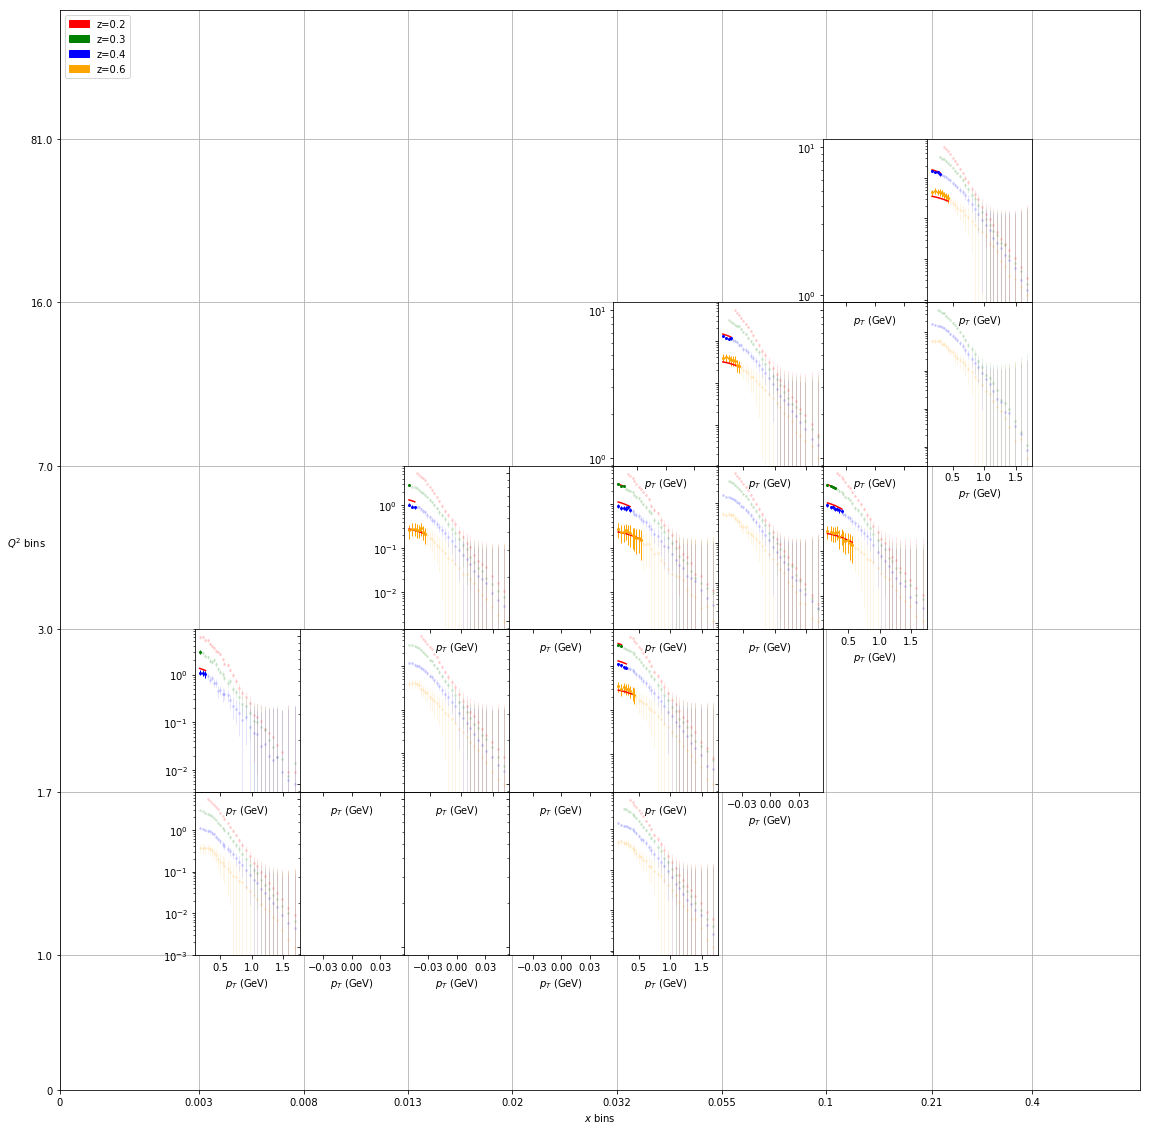

In [7]:
pT_fig, pT_ax = gridplot('pT', r'$p_T$ (GeV)')

### Plotting Against qT

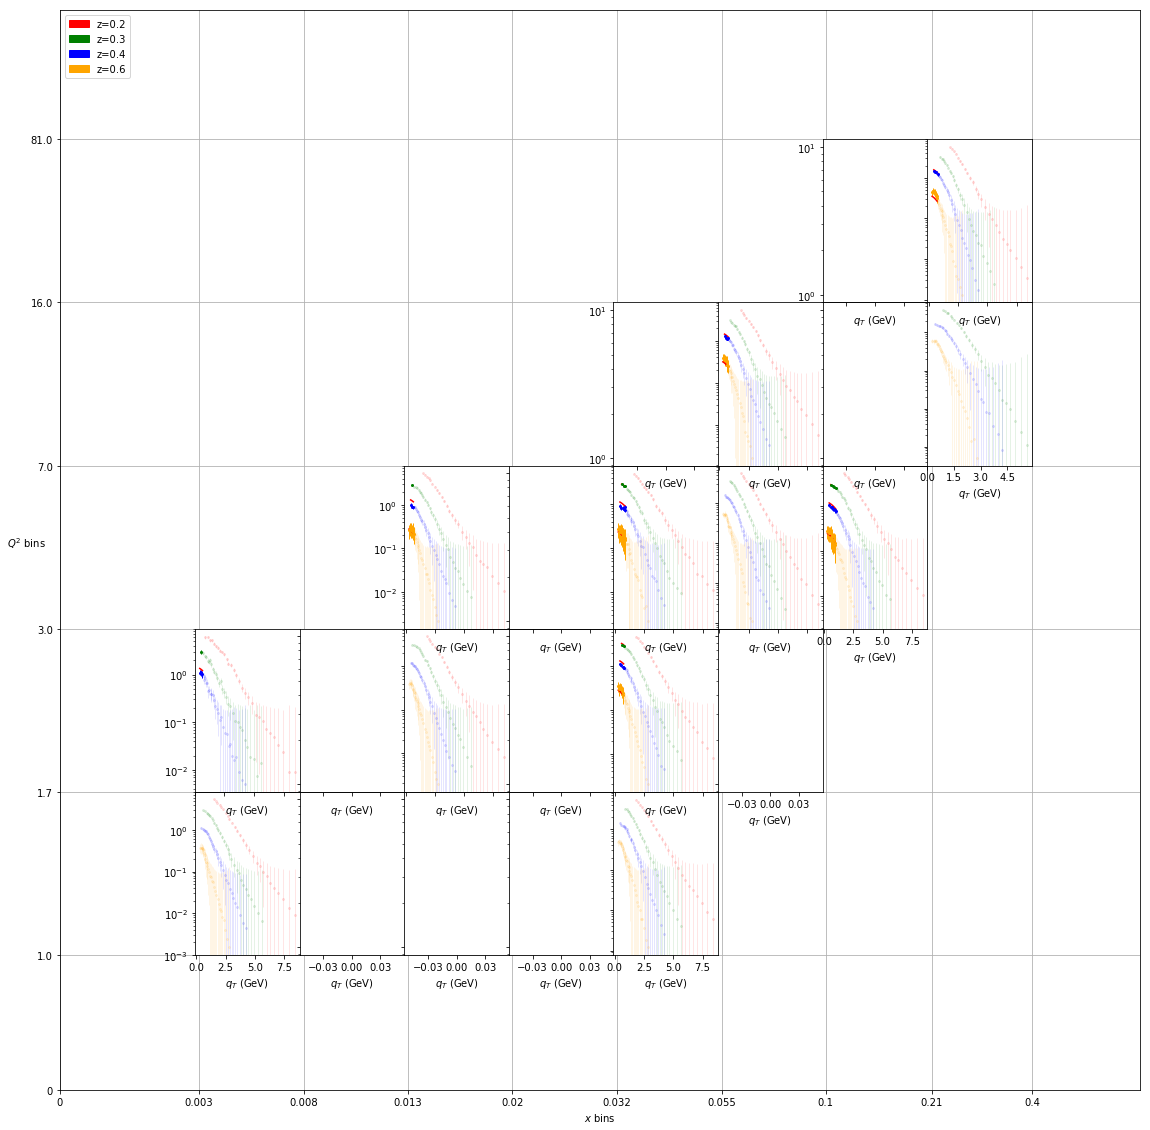

In [8]:
qT_fig, qT_ax = gridplot('qT', r'$q_T$ (GeV)')